In [1]:
from PIL import Image
import io, base64

img = Image.open("image.jpg")
img.thumbnail((1024, 1024), Image.Resampling.LANCZOS)
if img.mode not in ("RGB", "RGBA"):
    img = img.convert("RGB")

buffered = io.BytesIO()
img.save(buffered, format="WEBP", quality=85)
webp_b64 = base64.b64encode(buffered.getvalue()).decode()

# Send to API
import requests
response = requests.post(
    "http://localhost:8000/inference/sam3",
    json={"images": [webp_b64], "prompts": ["food", "plate"], "output_format": "rle"}
)

# Parse response
results = response.json()
image_results = results["results"][0]

In [2]:
from format_utils import cvat_rle_to_dense

for result in image_results:
    masks = result['result']['masks_rle']
    dense_masks = [cvat_rle_to_dense(mask) for mask in masks]
    result['result']['masks'] = dense_masks

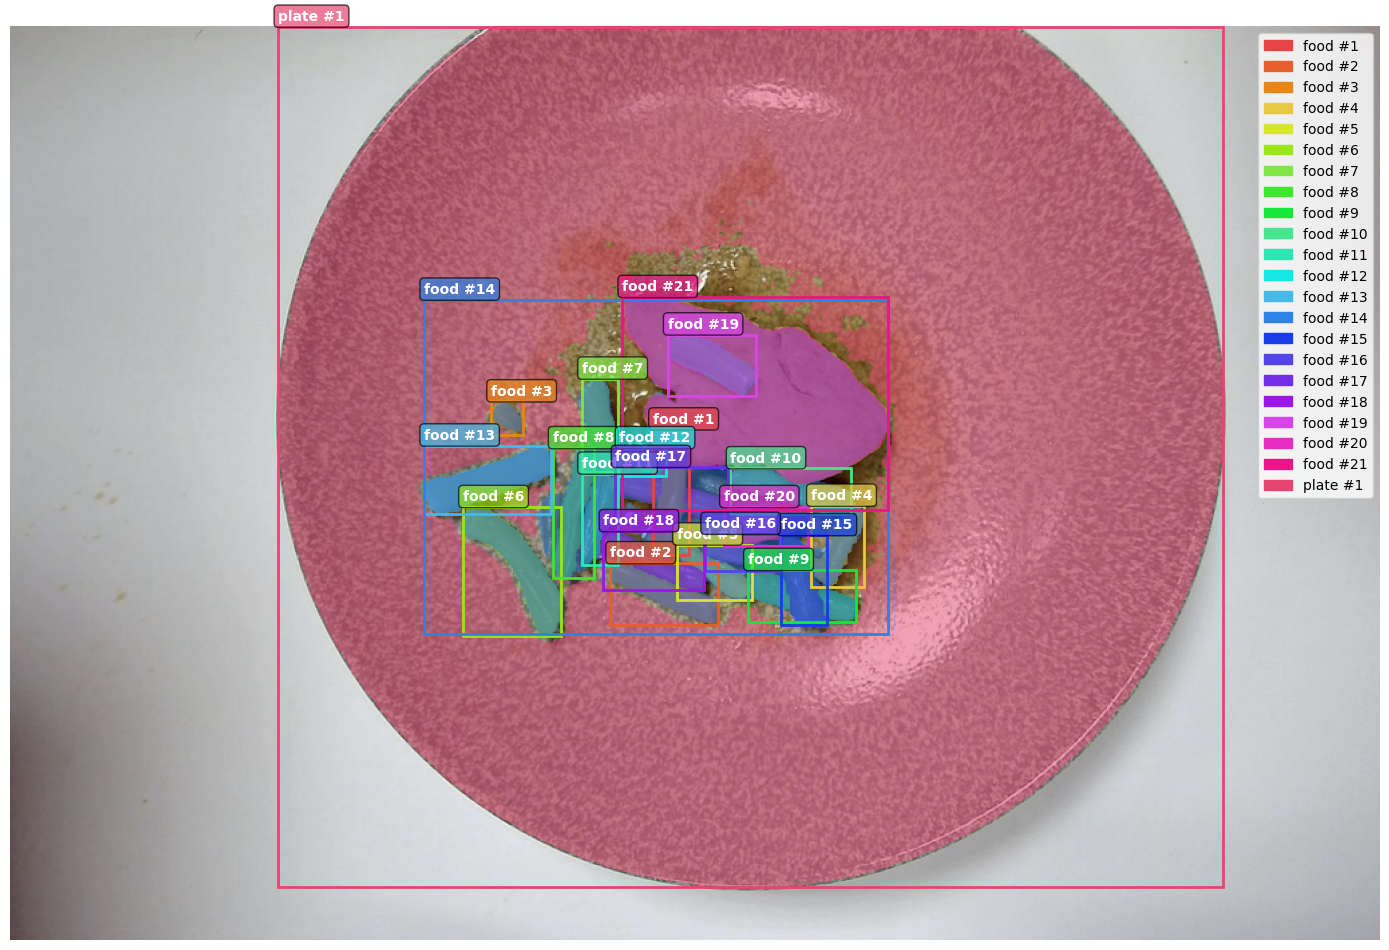

In [3]:
from visualization_utils import visualize_sam3_results
from matplotlib import pyplot as plt
# Quick visualization with overlay
fig = visualize_sam3_results(
    img,
    image_results,
    output_format='dense',
    mode='overlay',
    alpha=0.5,
    figsize=(14, 10)
)
plt.show()